# Import e leitura das bases

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('input/train.csv')

## Separação de treino e validação

Usarei a base de teste original para o modelo em produção

In [3]:
df["Transported"].value_counts()

Transported
True     4378
False    4315
Name: count, dtype: int64

In [4]:
X = df.drop("Transported", axis=1)
y = df["Transported"]

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, random_state=42)

In [6]:
X_train.shape, X_val.shape

((6954, 13), (1739, 13))

In [7]:
y_train.shape, y_val.shape

((6954,), (1739,))

In [8]:
train = pd.concat([X_train, y_train], axis=1)
val = pd.concat([X_val, y_val], axis=1)

# Análise dos dados e feature engineering

In [9]:
train.shape

(6954, 14)

In [10]:
train.head()

PassengerId HomePlanet CryoSleep     Cabin  Destination   Age    VIP  \
2333     2513_01      Earth     False       NaN  TRAPPIST-1e  28.0  False   
2589     2774_02      Earth     False   F/575/P  TRAPPIST-1e  17.0  False   
8302     8862_04     Europa      True   C/329/S  55 Cancri e  28.0  False   
8177     8736_02       Mars     False  F/1800/P  TRAPPIST-1e  20.0  False   
500      0539_02     Europa      True    C/18/P  55 Cancri e  36.0  False   

      RoomService  FoodCourt  ShoppingMall    Spa  VRDeck               Name  \
2333          0.0       55.0           0.0  656.0     0.0     Loree Mathison   
2589          0.0     1195.0          31.0    0.0     0.0  Crisey Mcbriddley   
8302          0.0        0.0           0.0    0.0     0.0     Alramix Myling   
8177          NaN        2.0         289.0  976.0     0.0          Tros Pota   
500           0.0        0.0           0.0    0.0     0.0     Achyon Nalanet   

      Transported  
2333        False  
2589        False  
8302         True  
8177         True  
500          True

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6954 entries, 2333 to 7270
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   6954 non-null   object 
 1   HomePlanet    6786 non-null   object 
 2   CryoSleep     6777 non-null   object 
 3   Cabin         6796 non-null   object 
 4   Destination   6815 non-null   object 
 5   Age           6806 non-null   float64
 6   VIP           6792 non-null   object 
 7   RoomService   6828 non-null   float64
 8   FoodCourt     6814 non-null   float64
 9   ShoppingMall  6789 non-null   float64
 10  Spa           6820 non-null   float64
 11  VRDeck        6803 non-null   float64
 12  Name          6795 non-null   object 
 13  Transported   6954 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 767.4+ KB


In [12]:
train.isna().sum()

PassengerId       0
HomePlanet      168
CryoSleep       177
Cabin           158
Destination     139
Age             148
VIP             162
RoomService     126
FoodCourt       140
ShoppingMall    165
Spa             134
VRDeck          151
Name            159
Transported       0
dtype: int64

Muitos nulos na base

<Axes: xlabel='Transported', ylabel='count'>

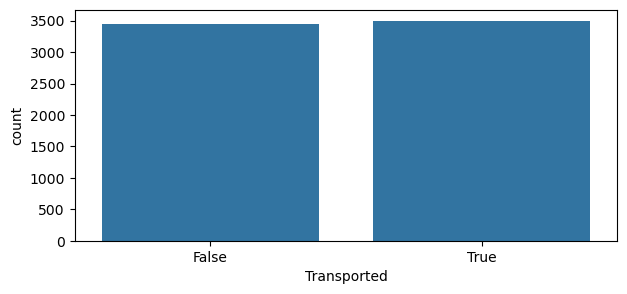

In [13]:
plt.figure(figsize=(7, 3))
sns.countplot(data=train, x="Transported")

Os dados estão balanceados

Colunas qualitativas:
1. PassengerId
2. HomePlanet
3. CryoSleep
4. Cabin
5. Destination
6. VIP
7. Name

Colunas quantitativas:
1. Age
2. RoomService
3. FoodCourt
4. ShoppingMall
5. Spa
6. VRDeck

Insights iniciais:
1. PassengerId --> podemos criar uma coluna com o tamanho do grupo
2. Cabin --> podemos separar o deck, num e side
3. Podemos juntar as variáveis de gasto para ter um gasto total



## Quantitativas

<Axes: xlabel='Age', ylabel='Count'>

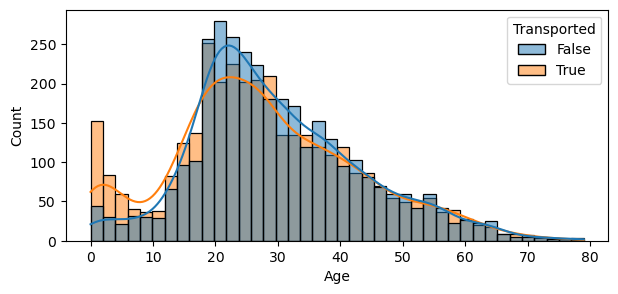

In [14]:
plt.figure(figsize=(7, 3))
sns.histplot(data=train, x="Age", hue="Transported", kde=True)

Pessoas de 0 a 10 anos tem mais chance de serem teletransportadas <br>
Pessoas de 17 até 25 anos tem mais chance de não serem teletransportadas <br>
Acima de 25 anos as chances são parecidas <br>

Podemos separar a coluna idade em categorias

In [15]:
train["Age_group"] = pd.cut(train["Age"], bins=[0, 10, 17, 25, np.inf], labels=[1, 2, 3, 4])
val["Age_group"] = pd.cut(val["Age"], bins=[0, 10, 17, 25, np.inf], labels=[1, 2, 3, 4])

In [16]:
train.head()

PassengerId HomePlanet CryoSleep     Cabin  Destination   Age    VIP  \
2333     2513_01      Earth     False       NaN  TRAPPIST-1e  28.0  False   
2589     2774_02      Earth     False   F/575/P  TRAPPIST-1e  17.0  False   
8302     8862_04     Europa      True   C/329/S  55 Cancri e  28.0  False   
8177     8736_02       Mars     False  F/1800/P  TRAPPIST-1e  20.0  False   
500      0539_02     Europa      True    C/18/P  55 Cancri e  36.0  False   

      RoomService  FoodCourt  ShoppingMall    Spa  VRDeck               Name  \
2333          0.0       55.0           0.0  656.0     0.0     Loree Mathison   
2589          0.0     1195.0          31.0    0.0     0.0  Crisey Mcbriddley   
8302          0.0        0.0           0.0    0.0     0.0     Alramix Myling   
8177          NaN        2.0         289.0  976.0     0.0          Tros Pota   
500           0.0        0.0           0.0    0.0     0.0     Achyon Nalanet   

      Transported Age_group  
2333        False         4  
2589        False         2  
8302         True         4  
8177         True         3  
500          True         4

<Axes: xlabel='Age_group', ylabel='count'>

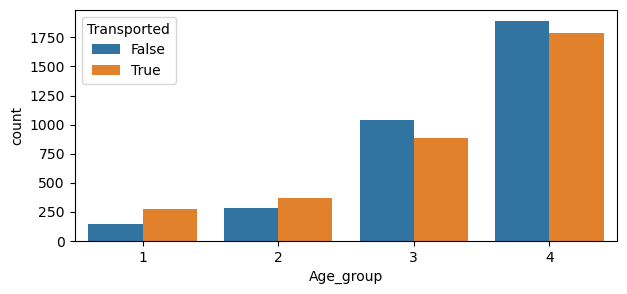

In [17]:
plt.figure(figsize=(7, 3))
sns.countplot(data=train, x="Age_group", hue="Transported")

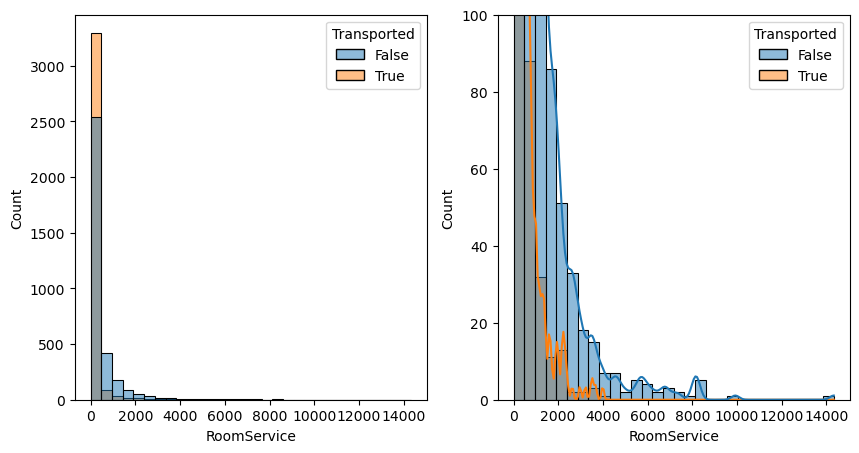

<Figure size 1000x400 with 0 Axes>

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.figure(figsize=(10, 4))
sns.histplot(data=train, x="RoomService", hue="Transported", bins=30, ax=axes[0])
sns.histplot(data=train, x="RoomService", hue="Transported", bins=30, kde=True, ax=axes[1])
axes[1].set_ylim([0, 100])
plt.show()

Muitas pessoas não gastaram nada, talvez faça sentido criar uma feature binária indicando se gastou ou não

Pessoas que gastam menos em serviço de quarto tem mais chance de serem teletransportadas

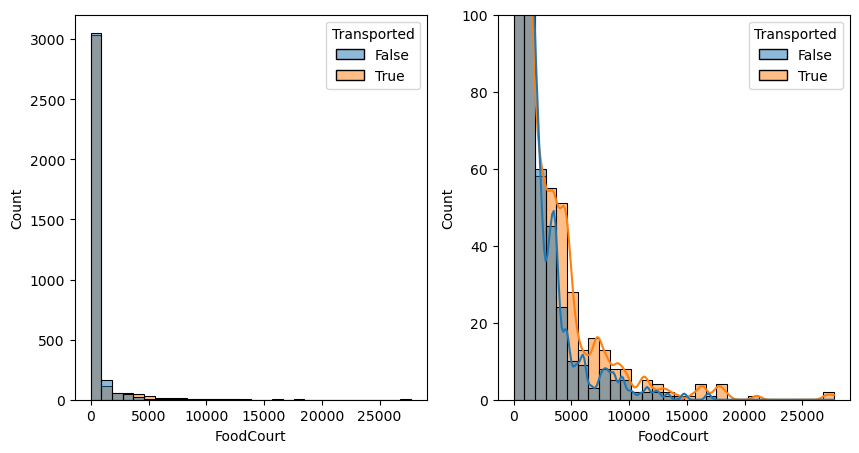

<Figure size 1000x400 with 0 Axes>

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.figure(figsize=(10, 4))
sns.histplot(data=train, x="FoodCourt", hue="Transported", bins=30, ax=axes[0])
sns.histplot(data=train, x="FoodCourt", hue="Transported", bins=30, kde=True, ax=axes[1])
axes[1].set_ylim([0, 100])
plt.show()

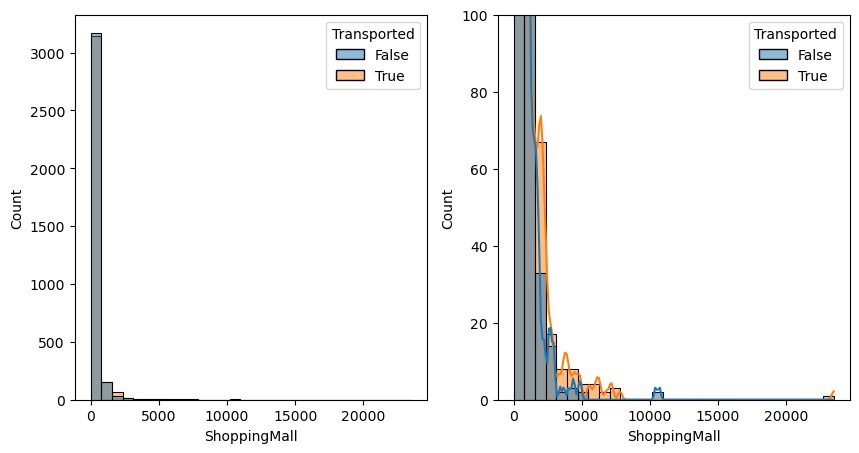

<Figure size 1000x400 with 0 Axes>

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.figure(figsize=(10, 4))
sns.histplot(data=train, x="ShoppingMall", hue="Transported", bins=30, ax=axes[0])
sns.histplot(data=train, x="ShoppingMall", hue="Transported", bins=30, kde=True, ax=axes[1])
axes[1].set_ylim([0, 100])
plt.show()

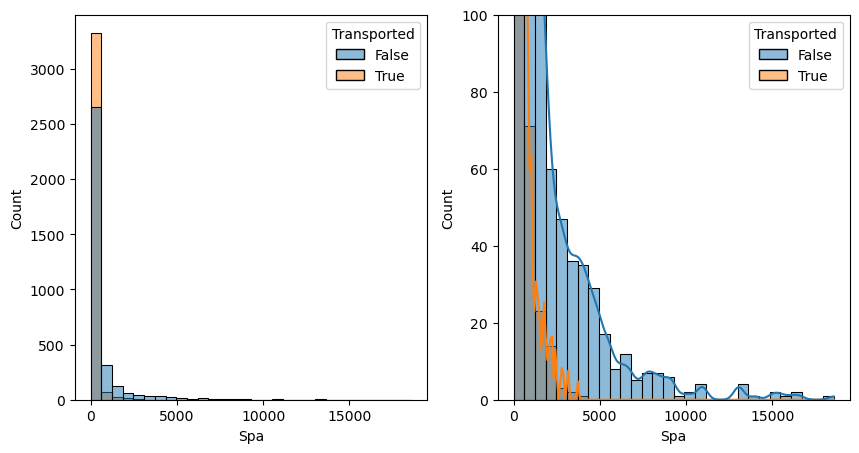

<Figure size 1000x400 with 0 Axes>

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.figure(figsize=(10, 4))
sns.histplot(data=train, x="Spa", hue="Transported",bins=30, ax=axes[0])
sns.histplot(data=train, x="Spa", hue="Transported", bins=30, kde=True, ax=axes[1])
axes[1].set_ylim([0, 100])
plt.show()

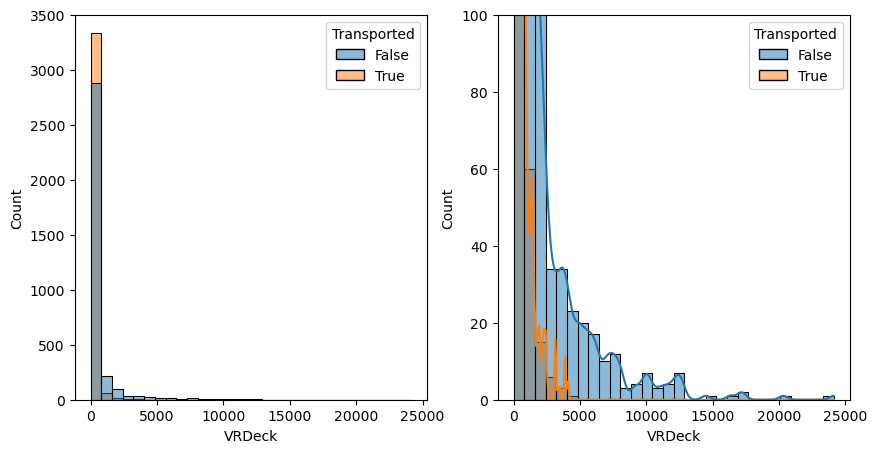

<Figure size 1000x400 with 0 Axes>

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
plt.figure(figsize=(10, 4))
sns.histplot(data=train, x="VRDeck", hue="Transported", bins=30, ax=axes[0])
sns.histplot(data=train, x="VRDeck", hue="Transported", bins=30, kde=True, ax=axes[1])
axes[1].set_ylim([0, 100])
plt.show()

In [23]:
train["total_spent"] = train["RoomService"] + train["FoodCourt"] + train["ShoppingMall"] + train["Spa"] + train["VRDeck"]
val["total_spent"] = val["RoomService"] + val["FoodCourt"] + val["ShoppingMall"] + val["Spa"] + val["VRDeck"]

Faremos o log do total gasto para reduzir a assimetria e melhorar a performance

In [24]:
train["log_total_spent"] = np.log(1+train["total_spent"])
val["log_total_spent"] = np.log(1+val["total_spent"])

<Axes: xlabel='log_total_spent', ylabel='Count'>

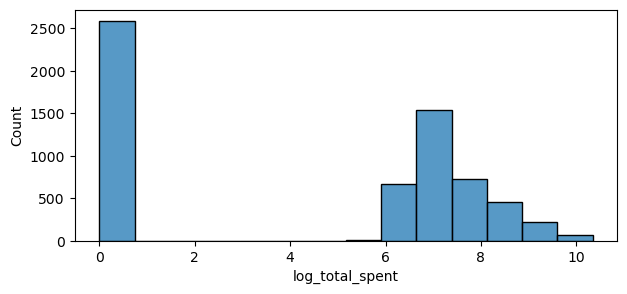

In [25]:
plt.figure(figsize=(7, 3))
sns.histplot(data=train, x="log_total_spent")

In [26]:
train["spent"] = np.where(train["total_spent"]==0, 0, 1)
val["spent"] = np.where(val["total_spent"]==0, 0, 1)

<Axes: xlabel='spent', ylabel='count'>

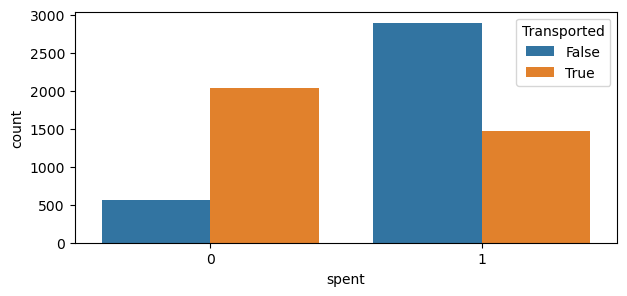

In [27]:
plt.figure(figsize=(7, 3))
sns.countplot(data=train, x="spent", hue="Transported")

## Qualitativas

In [28]:
train.head()

PassengerId HomePlanet CryoSleep     Cabin  Destination   Age    VIP  \
2333     2513_01      Earth     False       NaN  TRAPPIST-1e  28.0  False   
2589     2774_02      Earth     False   F/575/P  TRAPPIST-1e  17.0  False   
8302     8862_04     Europa      True   C/329/S  55 Cancri e  28.0  False   
8177     8736_02       Mars     False  F/1800/P  TRAPPIST-1e  20.0  False   
500      0539_02     Europa      True    C/18/P  55 Cancri e  36.0  False   

      RoomService  FoodCourt  ShoppingMall    Spa  VRDeck               Name  \
2333          0.0       55.0           0.0  656.0     0.0     Loree Mathison   
2589          0.0     1195.0          31.0    0.0     0.0  Crisey Mcbriddley   
8302          0.0        0.0           0.0    0.0     0.0     Alramix Myling   
8177          NaN        2.0         289.0  976.0     0.0          Tros Pota   
500           0.0        0.0           0.0    0.0     0.0     Achyon Nalanet   

      Transported Age_group  total_spent  log_total_spent  spent  
2333        False         4        711.0         6.568078      1  
2589        False         2       1226.0         7.112327      1  
8302         True         4          0.0         0.000000      0  
8177         True         3          NaN              NaN      1  
500          True         4          0.0         0.000000      0

In [29]:
train['Group'] = train['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)
val['Group'] = val['PassengerId'].apply(lambda x: x.split('_')[0]).astype(int)

train['Group_size']=train['Group'].map(lambda x: pd.concat([train['Group'], val['Group']]).value_counts()[x])
val['Group_size']=val['Group'].map(lambda x: pd.concat([train['Group'], val['Group']]).value_counts()[x])

<Axes: xlabel='Group_size', ylabel='count'>

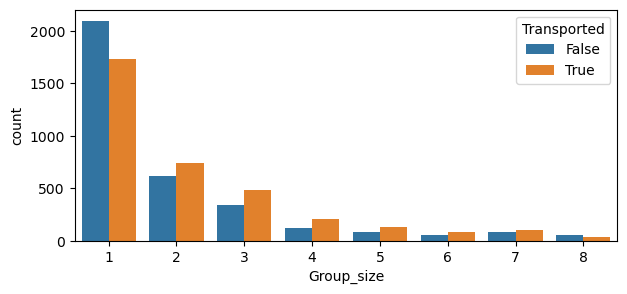

In [30]:
plt.figure(figsize=(7, 3))
sns.countplot(data=train, x='Group_size', hue='Transported')

In [31]:
train["solo"] = np.where(train["Group_size"]==1, 1, 0)
val["solo"] = np.where(val["Group_size"]==1, 1, 0)

<Axes: xlabel='solo', ylabel='count'>

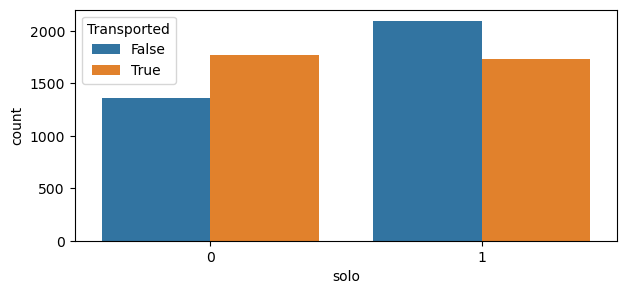

In [32]:
plt.figure(figsize=(7, 3))
sns.countplot(data=train, x='solo', hue='Transported')

<Axes: xlabel='HomePlanet', ylabel='count'>

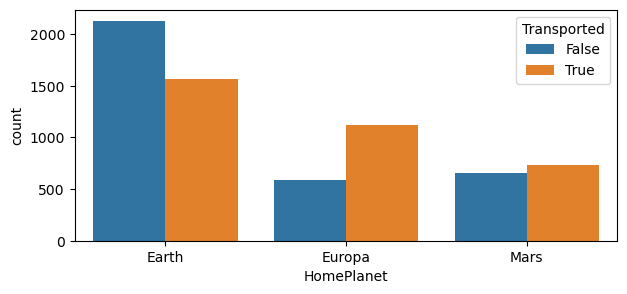

In [33]:
plt.figure(figsize=(7, 3))
sns.countplot(data=train, x="HomePlanet", hue="Transported")

<Axes: xlabel='CryoSleep', ylabel='count'>

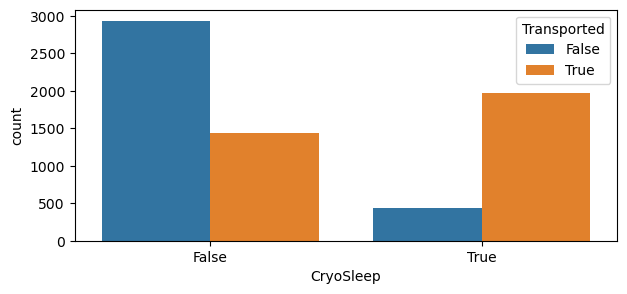

In [34]:
plt.figure(figsize=(7, 3))
sns.countplot(data=train, x="CryoSleep", hue="Transported")

In [35]:
train["deck"] = train["Cabin"].str.split("/", expand=True)[0]
train["num"] = train["Cabin"].str.split("/", expand=True)[1]
train["side"] = train["Cabin"].str.split("/", expand=True)[2]

val["deck"] = val["Cabin"].str.split("/", expand=True)[0]
val["num"] = val["Cabin"].str.split("/", expand=True)[1]
val["side"] = val["Cabin"].str.split("/", expand=True)[2]

<Axes: xlabel='deck', ylabel='count'>

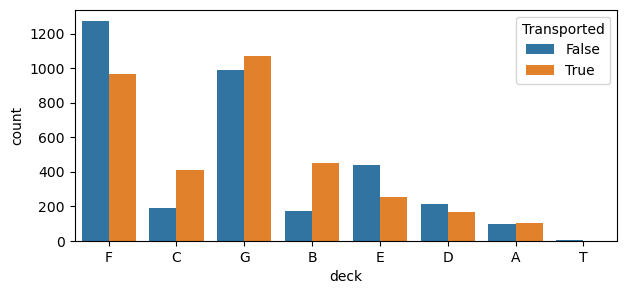

In [36]:
plt.figure(figsize=(7, 3))
sns.countplot(data=train, x="deck", hue="Transported")

O deck T parece ser um outlier

<Axes: xlabel='side', ylabel='count'>

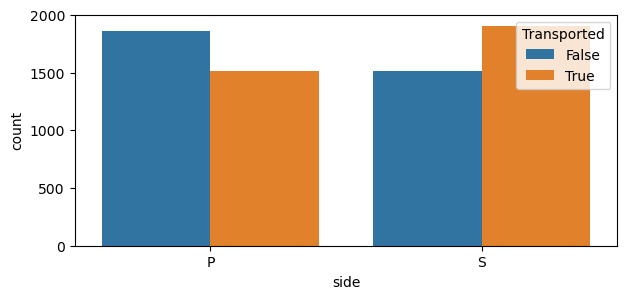

In [37]:
plt.figure(figsize=(7, 3))
sns.countplot(data=train, x="side", hue="Transported")

<Axes: xlabel='Destination', ylabel='count'>

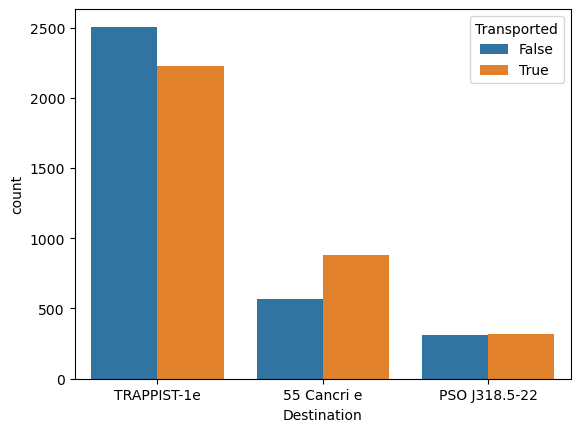

In [38]:
sns.countplot(data=train, x="Destination", hue="Transported")

<Axes: xlabel='VIP', ylabel='count'>

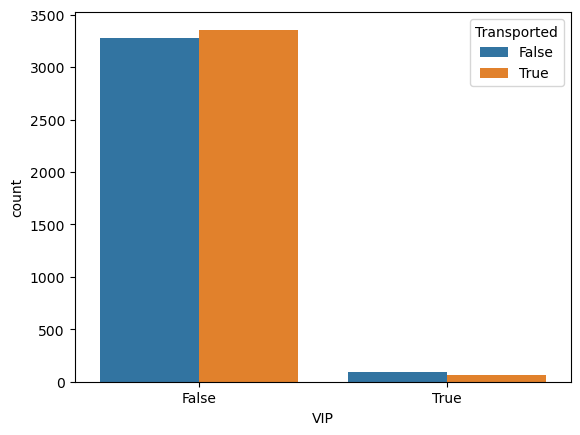

In [39]:
sns.countplot(data=train, x="VIP", hue="Transported")

A variável VIP não ajuda muito no modelo, melhor remover

In [40]:
train.to_csv("1_output/train_1.csv", index=False)

In [41]:
val.to_csv("1_output/val_1.csv", index=False)